In [47]:
from PQmodel import PQ,build_data
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig 

In [14]:
Muestras = 500
Ciclos = 1
Prueba = PQ(Cicles = Ciclos ,PeriodoDisturbio = Ciclos ,InicioDisturbio=0,FS=3841)
datosp = Prueba.PQaleatorio(Muestras)

In [26]:
ddp,targetp = build_data(datosp,cs=64)
ddp.shape

(14500, 64)

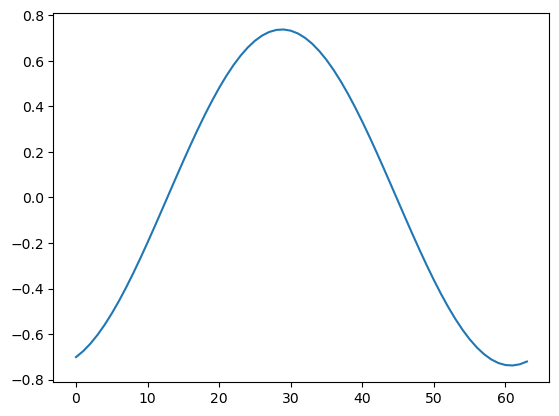

In [19]:
plt.plot(ddp[1])
plt.show()

In [25]:
media = np.mean(ddp,axis=1)
print(media.shape)

(14500,)


In [41]:
n = len(ddp)

X=np.array([media[v]- ddp[v,:] for  v in range (n)])


(14500, 64)

In [44]:
Covarianza = np.dot(X.T,X)/n-1

En las celdas anteriores hemos extraidio la media y la matriz de covarianzas de nuestro dataset este ultimo nos indica el nivel de correlacion que hay entre las senales lo que a su vez indica que tan relacionadas estan entre si o que tan serca estarian una de otra en un espacio vectorial de n dimensional.

La siguiente imagen muestra que estarian muy coorrelacionadas ya que lo que esparariamos ver seria una matriz diagonal es decir con valores en la diagonal y zeros fuera de la diagonal.

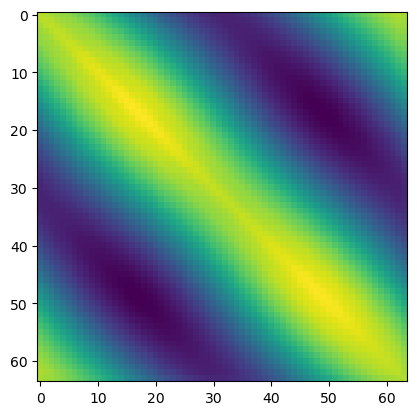

In [46]:
plt.imshow(Covarianza)
plt.show()

Lo que pretendemos con el PCA ("Principal Component Analysis") es:

    1: Cambiar el Espacio Vectorial

    2: Reducir la dimensionalidad de dicho espacio

    3: Diagonalizar la Matriz de Covarianza (que se decorrelacionen los datos)
    

Para este necesitamos una Matriz P 

$P^-1QP = \Lambda$

donde $\Lambda$ es una matriz diagonal donde dicha diagonal contiene todos los eigen valores $\lambda$ de la matriz Q



In [101]:
PEigV,Peig=eig(Covarianza) #Extraemos unicamente los EigenVectores
 

In [93]:
#print(PEigV)
print(np.sort(PEigV,kind = "mergesort")[::-1])


[ 2.02721335e+01  1.63150840e+01  1.24963753e-01  1.22567842e-01
  9.14239074e-02  8.97335895e-02  8.86156686e-02  8.76671176e-02
  8.54369468e-02  8.45435419e-02  8.28166134e-02  8.07512505e-02
  7.62923130e-02  7.42042603e-02  6.75334558e-02  6.57145563e-02
  6.10538982e-02  5.79270775e-02  5.03559823e-02  4.88502471e-02
  4.06782230e-02  3.96648447e-02  3.23743289e-02  2.93508159e-02
  2.64452314e-02  1.62033619e-02  1.23149687e-02  6.59539536e-03
  5.83147443e-03  4.46374583e-03  3.16163661e-03  2.35244904e-03
  2.14644713e-03  1.91229165e-03  1.56811809e-03  1.28436421e-03
  1.05689930e-03  9.02283986e-04  8.28710624e-04  7.74894771e-04
  6.45620920e-04  6.20475420e-04  5.38749723e-04  5.01274334e-04
  4.68101901e-04  4.36515338e-04  4.11600336e-04  3.85491147e-04
  3.57613099e-04  3.38812157e-04  3.18577652e-04  3.02359313e-04
  2.81386616e-04  2.75747387e-04  2.48348779e-04  2.33582779e-04
  2.11195274e-04  1.94605290e-04  1.88446103e-04  1.84372860e-04
  1.68903360e-04  1.63515

In [107]:
nfeatures=10
Eigenvalores_dominantes = [list(PEigV).index(np.sort(PEigV,kind = "mergesort")[::-1][v]) for v in range(nfeatures)]

In [134]:
Pextrac = Peig.T[Eigenvalores_dominantes]

In [135]:
print(Peig[2])

[-0.125      -0.17488705 -0.02535935  0.16713234  0.04067846  0.03449428
 -0.00595099  0.21642459  0.08415785 -0.03145061  0.05266042  0.04262504
 -0.09371742 -0.10665637  0.17575101 -0.03034292  0.23071047 -0.15894949
 -0.09700799  0.00171785 -0.20514164  0.12291403  0.25779784  0.01995041
  0.10889001 -0.19704027  0.13168775 -0.24218207  0.02163505  0.14539202
  0.03133594 -0.03029376  0.0827822  -0.04424469  0.058445    0.17333507
  0.19131581 -0.34508093 -0.28070531 -0.30966681  0.24810446  0.06620845
  0.03858473 -0.06812036 -0.02210666 -0.01901602  0.02147126 -0.01122837
  0.01099582 -0.00370024 -0.00106762 -0.00676816  0.00245162  0.00937995
  0.00614884  0.00908216  0.01228357 -0.01610885 -0.0118031  -0.0130294
  0.03518355  0.00218857 -0.01438182 -0.00371476]


In [136]:
print(Pextrac[1])

[-0.17557115 -0.17649084 -0.17488705 -0.17093906 -0.16575575 -0.15930833
 -0.15159273 -0.1425582  -0.13195773 -0.11977016 -0.10634184 -0.09161614
 -0.07624851 -0.06057963 -0.04467748 -0.0279718  -0.01056502  0.00666788
  0.0234464   0.04030383  0.05762071  0.07465447  0.0901733   0.10413767
  0.11744382  0.12995721  0.14122512  0.15078765  0.15884611  0.16580004
  0.17133361  0.1749078   0.17664086  0.17687976  0.175649    0.17242721
  0.1671304   0.16064171  0.15299494  0.14357303  0.1322822   0.1197018
  0.10620183  0.09197198  0.07679693  0.06088018  0.04444342  0.02739982
  0.01005729 -0.00729013 -0.02448544 -0.04158004 -0.05866924 -0.0752139
 -0.09076785 -0.10535168 -0.11889493 -0.13123113 -0.14235204 -0.15203648
 -0.16025349 -0.16700571 -0.17251225 -0.16850225]


In [121]:
print(Peig.shape)
print(Pextrac.shape)

(64, 64)
(10, 64)


In [159]:
Transformacion= np.dot(X,Pextrac.T)

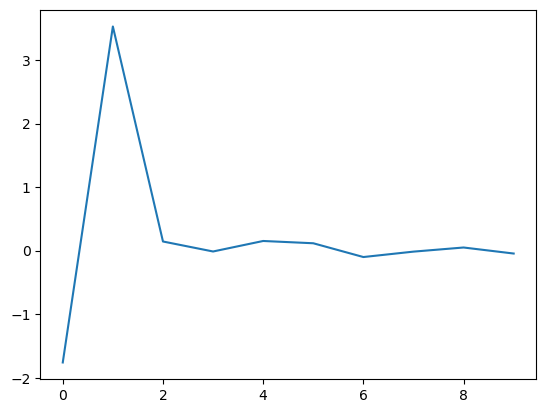

In [162]:
plt.plot(Transformacion[1000])

Ahora vamos a vizualizar la matriz de covarianzas resultante y veamos si los datos se decorrrelacionarion. Los datos NO se van a decorrelacionar si utilizamos todos los eigenvalores, por lo que es necesario quedarnos unicamente con los de mayor valor

In [157]:
CovTrans= np.dot(Transformacion.T,Transformacion)/n

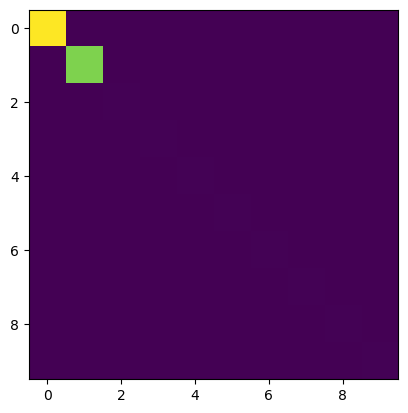

In [158]:
plt.imshow(CovTrans)
plt.show()

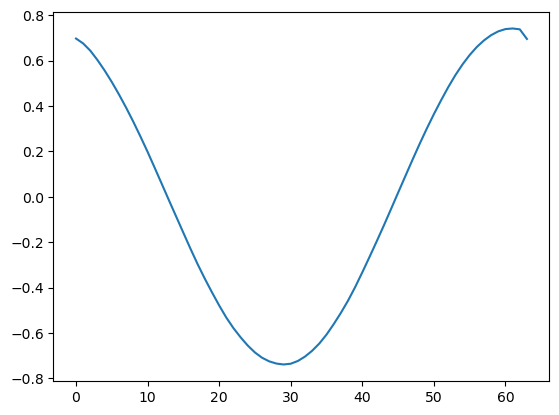

In [163]:
plt.plot(np.dot(Transformacion[1],Pextrac))
plt.show()

In [164]:
def myPCA(Xt,features=10): #Unicamente sirve para senales de 1D
    mean = np.mean(Xt,axis=1)
    n = len(Xt)
    Xm=np.array([mean[v]- Xt[v,:] for  v in range (n)])
    Cov = np.dot(Xm.T,Xm)/n-1
    Evalues,Evectors=np.linalg.eig(Cov)
    Epca = [list(Evalues).index(np.sort(Evalues,kind = "mergesort")[::-1][v]) for v in range(features)]
    Ppca = Evectors.T[Epca]
    Xpca = np.dot(Xm,Ppca.T)

    return Xpca,Ppca
    